# Austism Prediction using Machine Learning


Autism is a neurological disorder that affects a person’s ability to interact with others, make eye contact with others, learn capacity, and other behavioral and social capabilities of a person.

But there is no ascertain way to tell whether a person has Autism or not because there are no such diagnostics methods available to diagnose this disorder. But what if we use machine learning to predict whether a person suffers from Autism or not? 

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy – Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn – This library is used to draw visualizations.

Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

Imblearn – This module contains a function that can be used for handling problems related to data imbalance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings ('ignore')

Now let's load the dataset into the pandas data frame and print it's first five rows.

In [2]:
df = pd.read_csv('Documents/archive/train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

Now let's check the size of the dataset

In [3]:
df.shape

(800, 22)

Let's check which column of the datset contains which type of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

As per the above information regarding the data in each column we can onserve that theer are no null values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
##Data Cleaning

In [7]:
df['ethnicity'].value_counts()

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In the above two outputs we can observe some ambiguity that there are ‘?’, ‘others’, and ‘Others’ which all must be the same as they are unknown or we can say that null values have been substituted with some indicator.

In [8]:
df['relation'].value_counts()

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

The same is the case with this column so, let’s clean this data, and along with this let’s convert ‘yes’ and ‘no’ to 0 and 1.




In [9]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

Now we have cleaned the data a bit to derive insights from it.



In [10]:
##Exploratory Data Analysis

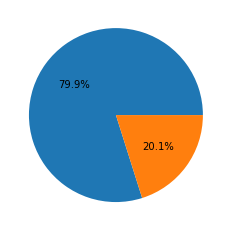

In [11]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

The dataset we have is highly imbalanced. If we will train our model using this data then the model will face a hard time predicting the positive class which is our main objective here to predict whether a person has autism or not with high accuracy.

In [12]:
ints =[]
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

Now, we have columns segregated based on the type of data they contain hence now we’ll be able to perform suitable analysis depending upon the type of data.




In [13]:
ints.remove('ID')
ints.remove('Class/ASD')

The ‘ID’ column will contain a unique value for each of the rows and for the column ‘Class/ASD’ we have already analyzed its distribution so, that is why they have been removed in the above code.




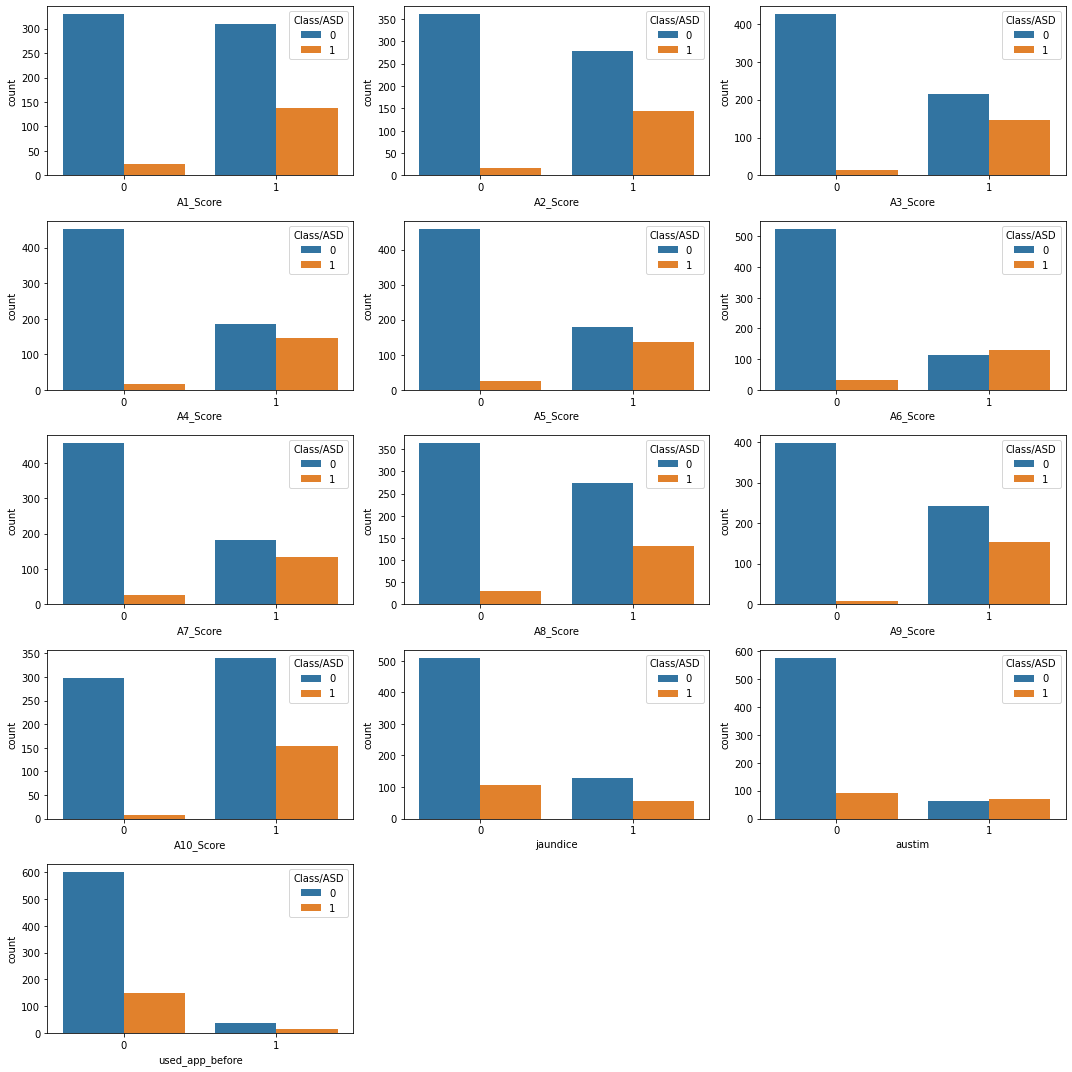

In [14]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
    plt.subplot(5,3,i+1)
    sb.countplot(df[col], hue=df['Class/ASD'])
plt.tight_layout()
plt.show()

From these plots, we can conclude that if the score of some indicator is 0 then the chances of that person not having autism is quite high except in the case of A10_Score.




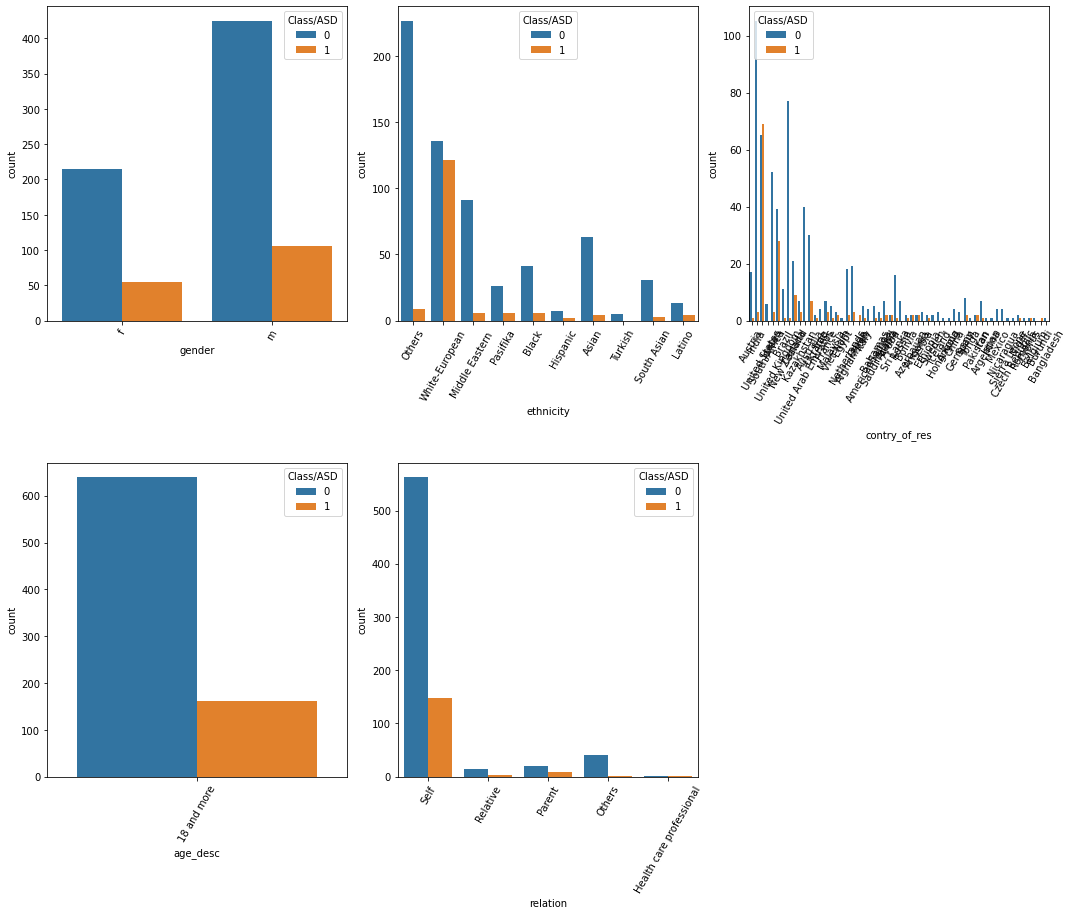

In [15]:
plt.subplots(figsize=(15,30))

for i, col in enumerate(objects):
    plt.subplot(5,3,i+1)
    sb.countplot(df[col], hue=df['Class/ASD'])
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

From the above plots we can draw the following observations:

- Age_desc is the same for all the data points.
- This used_app_before feature doesn’t seem to be useful or it will be the source of data leakage.
- Here it seems like the chances of a male having autism is higher than a female but that is not true because we don’t have an equal number of examples of males and females.

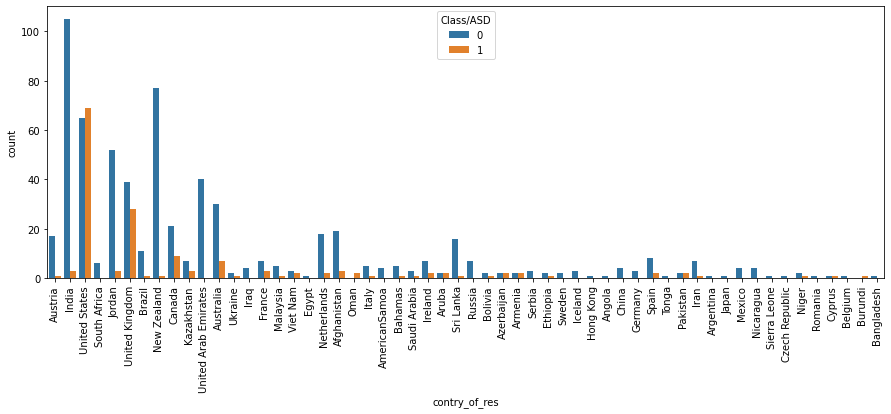

In [16]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. This implies that the geography of a person also gives an idea of having autism.




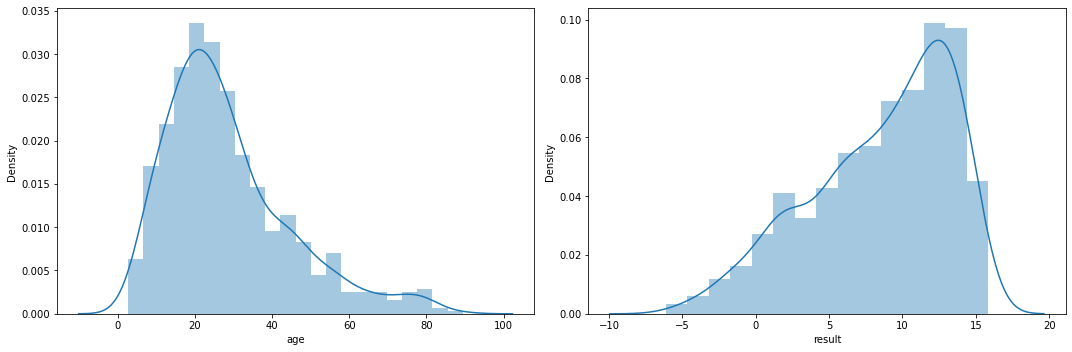

In [17]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

Both of the continuous data are skewed left one is positive and the right one is negatively skewed.




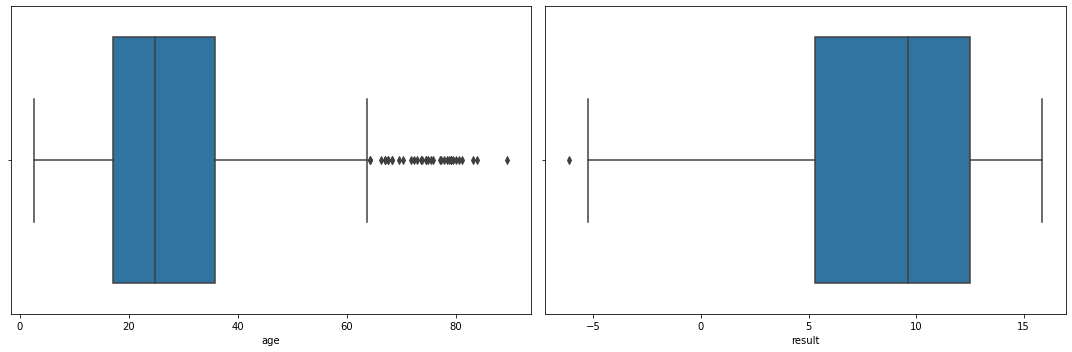

In [18]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

Ah! some outliers in the result column. Let’s remove that as it doesn’t seem like too much loss of information.




In [19]:
df = df[df['result']>-5]
df.shape

(798, 22)

So, here we lost only two data points.



In [20]:
##Feature Engineering


Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.




In [21]:
# This function makes groups by taking 
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)
    
    

Now, let’s explore the number of cases for each age group.




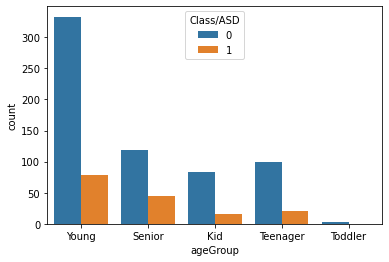

In [22]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

Here we can conclude that the Young and Toddler group of people have lower chances of having Autism.

In [23]:
def add_feature(data):
    
    # Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        
        #updating the 'sum_score' value with scores
        # from A1 to A10
        data['sum_score'] += data[col]
        
    #creating a random data using the below three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
    
    return data

df = add_feature(df)

In the above code block, we have just summed up the clinical scores given from A1 to A10.

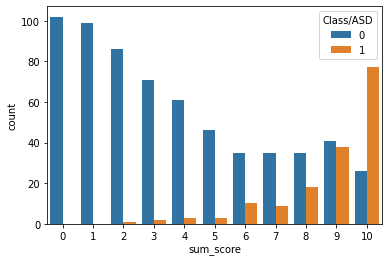

In [24]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

Another amazing observation higher the sum score higher the chances of having autism is higher as well and similarly for lower sum scores that are for less than 5 it is rare that the person has autism.




In [25]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

The age data given to us is positively skewed. As we know that skewed data impacts the performance of the model, we will apply log transformations to remove the skewness of the data.

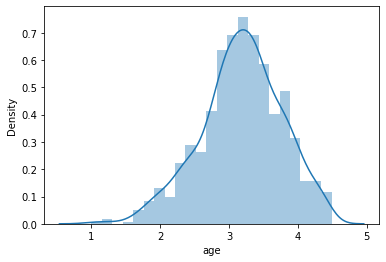

In [26]:
sb.distplot(df['age'])
plt.show()

Now, the skewness of the data has been removed successfully by using the log transformations.




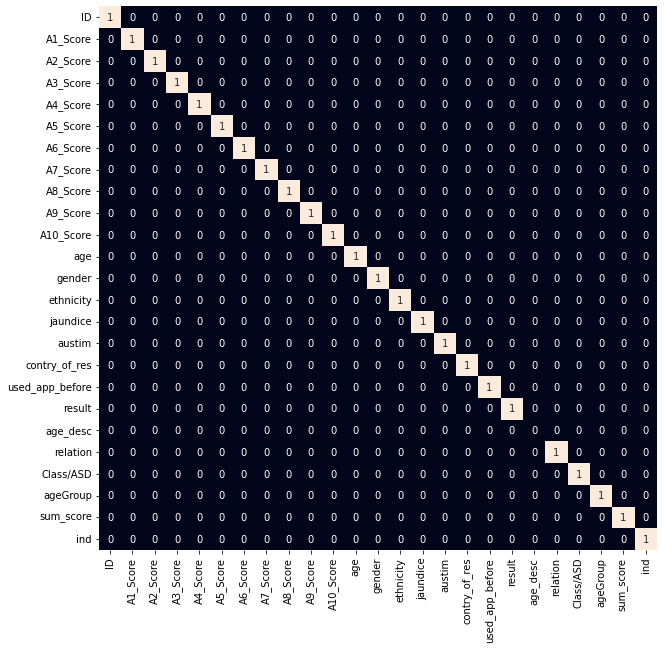

In [27]:
def encode_labels(data):
    for col in data.columns:
        
        # Here we will check if datatype
        # is object then we will encode it
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            
    return data

df = encode_labels(df)

#Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()> 0.8, annot=True, cbar=False)
plt.show()

From the above heat map, we can see that there are only one highly correlated features which we will remove before training the model on this data as highly correlated features do not help in learning useful patterns in the data.

## Model Training


Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [28]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

Let’s split the data into training and validation data. Also, the data was imbalanced earlier now we will balance it using the Random Over Sampler in this method we sample some points from the minority class and repeat it multiple times so, that the two classes get balanced.




In [29]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape,Y.shape

((1026, 20), (1026,))

Now, let’s normalize the data to obtain stable and fast training.

In [30]:
# Normalizing the features for stable and fast training
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

Now let’s train some state-of-the-art machine learning models and compare them which fit better with our data.




In [31]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X,Y)
    
    print(f'{model}: ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val,model.predict(X_val)))
    print()

LogisticRegression(): 
Training Accuracy :  0.8664717348927876
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
Training Accuracy :  1.0
Validation Accuracy :  0.6993727598566308

SVC(): 
Training Accuracy :  0.9405458089668616
Validation Accuracy :  0.

In [32]:
## Model Evaluation


From the above accuracies, we can say that Logistic Regression and SVC() classifier perform better on the validation data with less difference between the validation and training data. 




In [33]:
## Conclusion:

The machine learning model we have created is around 80% to 85% accurate. The disease for which there are no diagnostics methods machine learning models are able to predict whether the person has Autism or not. This is the power of machine learning by using which many of the real-world problems are being solved.